![](img/logo.png)

# Data analysis: Pandas and Seaborn
## Yoav Ram

_Pandas_ is a very strong library for manipulating large and complex datasets using a new data structure, the **data frame**, which models a table of data.
Pandas helps to close the gap between Python and R for data analysis and statistical computing.

Pandas data frames address three deficiencies of NumPy arrays:

- data frame hold heterogenous data; each column can have its own numpy.dtype,
- the axes of a data frame are labeled with column names and row indices,
- and, they account for missing values which this is not directly supported by arrays.

Data frames are extremely useful for data manipulation.
They provide a large range of operations such as filter, join, and group-by aggregation, as well as plotting.

In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', UserWarning)
warnings.simplefilter('ignore', DeprecationWarning)

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 1000)
print('Pandas version:', pd.__version__)

Pandas version: 2.2.2


# Statistical Analysis of Life History Traits

We will analyze animal life-history data from [AnAge](http://genomics.senescence.info/download.html#anage). 

In [2]:
data = pd.read_csv('../data/anage_data.txt', sep='\t') # lots of other pd.read_... functions
print(type(data))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(4219, 31)


Pandas holds data in `DataFrame` (similar to _R_).
`DataFrame` have a single row per observation (in contrast to the previous exercise in which each table cell was one observation), and each column has a single variable. Variables can be numbers or strings.

The `head` method gives us the 5 first rows of the data frame.

In [3]:
data.head()

,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),Male maturity (days),Gestation/Incubation (days),Weaning (days),Litter/Clutch size,Litters/Clutches per year,Inter-litter/Interbirth interval,Birth weight (g),Weaning weight (g),Adult weight (g),Growth rate (1/days),Maximum longevity (yrs),Source,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References
0,3,Animalia,Arthropoda,Branchiopoda,Diplostraca,Daphniidae,Daphnia,pulicaria,Daphnia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.19,NaN,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"1294,1295,1296"
1,5,Animalia,Arthropoda,Insecta,Diptera,Drosophilidae,Drosophila,melanogaster,Fruit fly,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.30,NaN,captivity,large,acceptable,0.05,0.04,NaN,NaN,NaN,"2,20,32,47,53,68,69,240,241,242,243,274,602,98..."
2,6,Animalia,Arthropoda,Insecta,Hymenoptera,Apidae,Apis,mellifera,Honey bee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.00,812,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"63,407,408,741,805,806,808,812,815,828,830,831..."
3,8,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Cardiocondyla,obscurior,Cardiocondyla obscurior,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50,1293,captivity,medium,acceptable,NaN,NaN,NaN,NaN,NaN,1293
4,9,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Lasius,niger,Black garden ant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.00,411,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"411,813,814"


In [4]:
data.tail()

,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),Male maturity (days),Gestation/Incubation (days),Weaning (days),Litter/Clutch size,Litters/Clutches per year,Inter-litter/Interbirth interval,Birth weight (g),Weaning weight (g),Adult weight (g),Growth rate (1/days),Maximum longevity (yrs),Source,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References
4214,4239,Animalia,Porifera,Hexactinellida,Lyssacinosida,Rossellidae,Scolymastra,joubini,Hexactinellid sponge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.00,688,wild,medium,questionable,NaN,NaN,NaN,NaN,NaN,688
4215,4241,Plantae,Pinophyta,Pinopsida,Pinales,Pinaceae,Pinus,longaeva,Great Basin bristlecone pine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5062.00,1289,wild,medium,acceptable,NaN,999.0,NaN,NaN,NaN,"501,710,1289"
4216,4242,Fungi,Ascomycota,Saccharomycetes,Saccharomycetales,Saccharomycetaceae,Saccharomyces,cerevisiae,Baker's yeast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,NaN,captivity,large,acceptable,NaN,NaN,NaN,NaN,NaN,"4,12,15,44,45,53,56,69,337,338,460,746,932,936..."
4217,4243,Fungi,Ascomycota,Schizosaccharomycetes,Schizosaccharomycetales,Schizosaccharomycetaceae,Schizosaccharomyces,pombe,Fission yeast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,small,low,NaN,NaN,NaN,NaN,NaN,"772,878,1129"
4218,4244,Fungi,Ascomycota,Sordariomycetes,Sordariales,Lasiosphaeriaceae,Podospora,anserina,Filamentous fungus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,small,low,NaN,NaN,NaN,NaN,NaN,"767,768,769,770,771,921,1203"


`DataFrame` has many of the features of `numpy.ndarray` - it also has a `shape` and various statistical methods (`max`, `mean` etc.).
However, `DataFrame` allows richer indexing.
For example, let's browse our data for species that have body mass greater than 300 kg.
First we will a create new column (`Series` object) that tells us if a row is a large animal row or not:

In [5]:
large_index = data['Body mass (g)'] > 300 * 1000 # 300 kg
large_index.head()

0    False
1    False
2    False
3    False
4    False
Name: Body mass (g), dtype: bool

Now, we slice our data with this boolean index. 
The `iterrows` method let's us iterate over the rows of the data.
For each row we get both the row as a `Series` object (similar to `dict` for our use) and the row number as an `int` (this is similar to the use of `enumerate` on lists and strings).

In [6]:
large_data = data[large_index]
for i, row in large_data.iterrows(): 
    print(row['Common name'], row['Body mass (g)']/1000, 'kg')

Domestic cattle 347.0 kg
Dromedary 407.0 kg
Moose 325.0 kg
Asiatic elephant 3672.0 kg
West Indian manatee 450.0 kg


So... a [Dromedary](http://en.wikipedia.org/wiki/Dromedary) is the single-humped camel.

![Camel](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Camelus_dromedarius_in_Nuweiba.jpg/320px-Camelus_dromedarius_in_Nuweiba.jpg)

Let's continue with small and medium animals - we filter out anything that doesn't have body mass of less than 300 kg.

In [7]:
data = data[data['Body mass (g)'] <  300 * 1000]

For starters, let's plot a scatter of body mass vs. metabolic rate.
Because we work with pandas, we can do that with the `plot` method of `DataFrame`, specifying the columns for `x` and `y` and a plotting style (without the style we would get a line plot which makes no sense here).

You can change `%matplotlib inline` to `%matplotlib widget` to get interactive plotting -- if this causes errors, just stay with `inline`, as the `widget` feature is new and may require to update some packages.

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

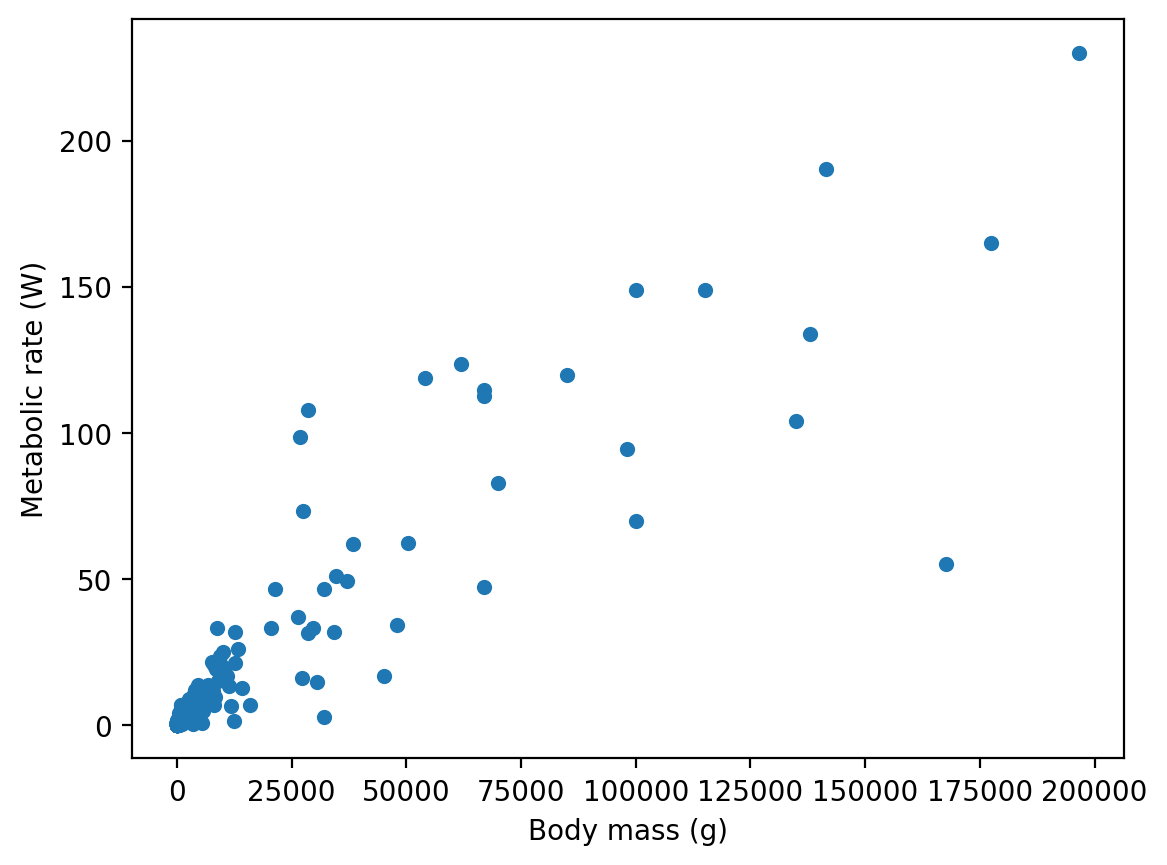

In [9]:
data.plot.scatter(x='Body mass (g)', y='Metabolic rate (W)');

Seems like most of the data points are in the lower left corner (most animals are small!) so let's zoom in.

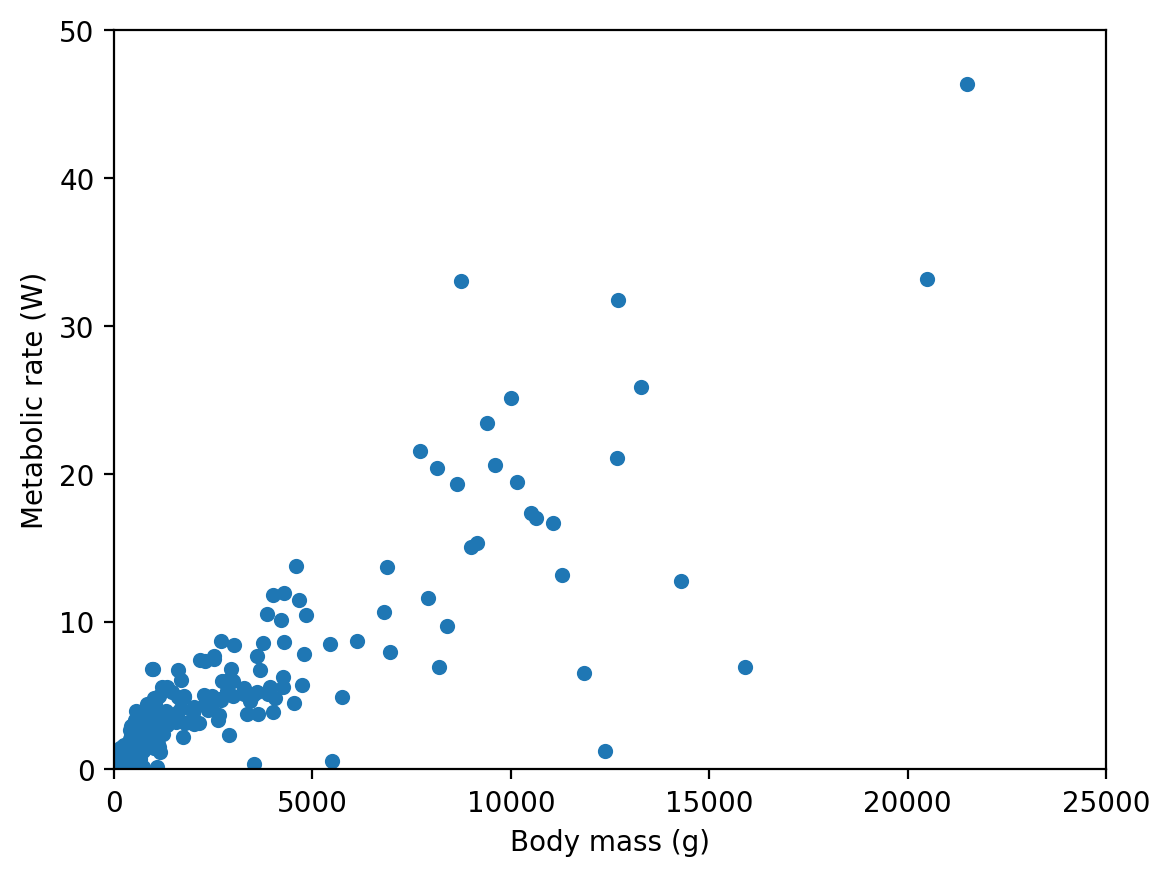

In [10]:
data.plot.scatter(x='Body mass (g)', y='Metabolic rate (W)')
plt.xlim(0, 25000)
plt.ylim(0, 50);

Again!

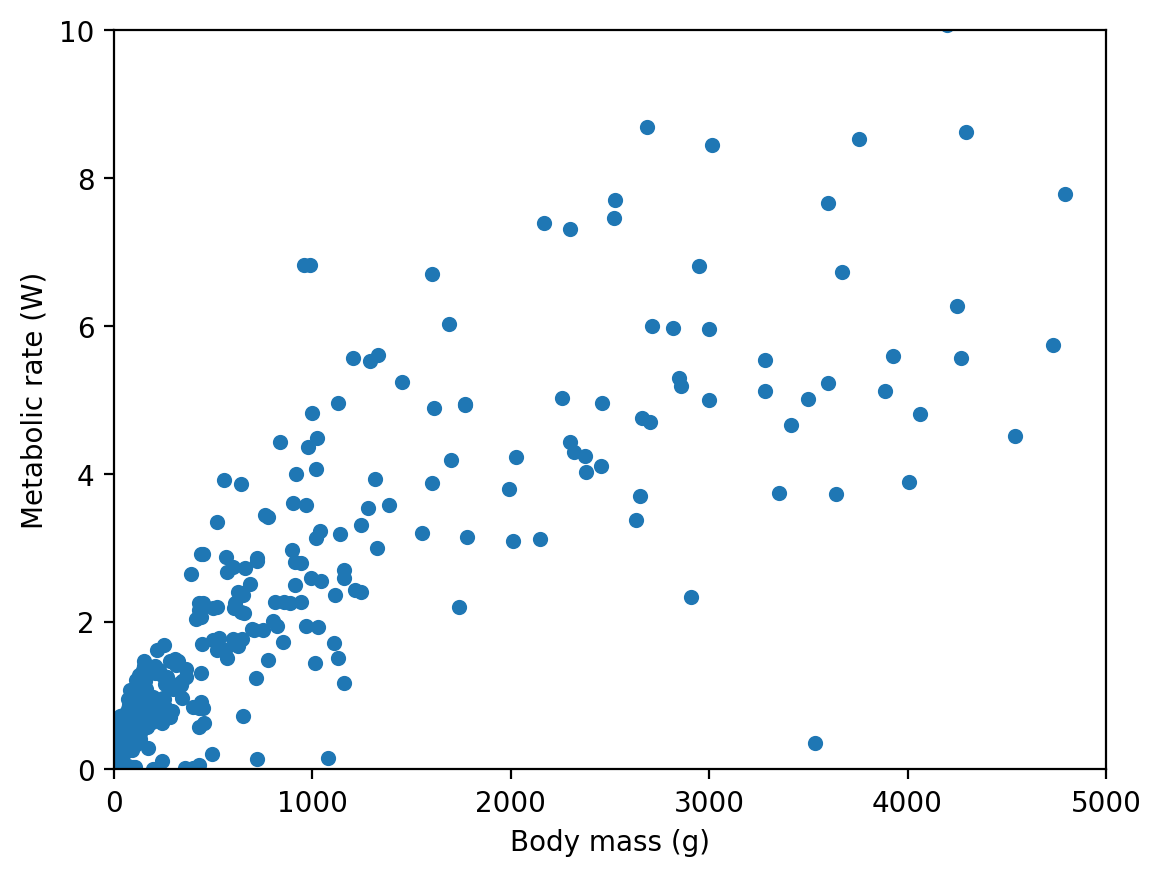

In [11]:
data.plot.scatter(x='Body mass (g)', y='Metabolic rate (W)')
plt.xlim(0, 5000)
plt.ylim(0, 10);

Zooming in does not help - we should try to use a log-log scale.

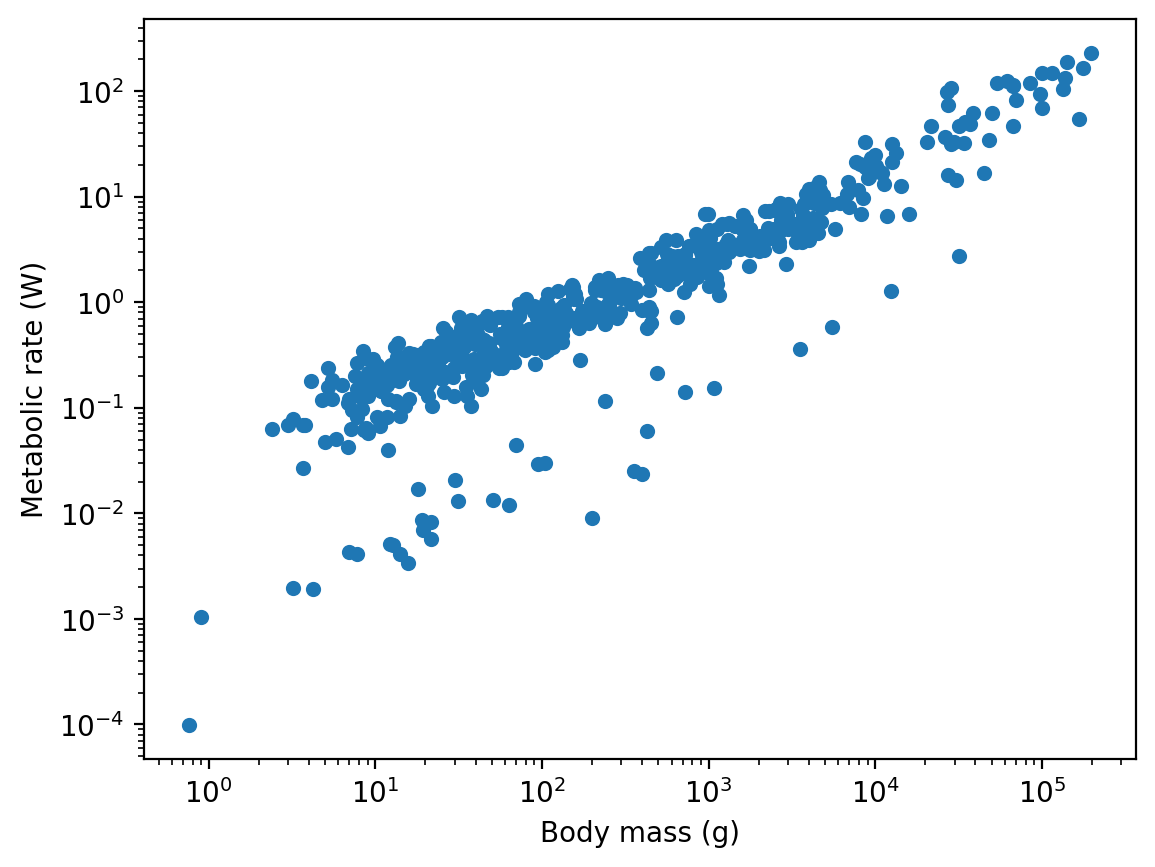

In [12]:
data.plot.scatter(x='Body mass (g)', y='Metabolic rate (W)')
plt.xscale('log')
plt.yscale('log');

This looks promising! There seems to be a linear relationship in the log-log scale, with two distinct groups, such that:
$$
\log{y} = a \log(x) + b \Rightarrow $$$$
y = B x^a \; (B = e^b)
$$

So let's create new columns for log of body mass and log of metabolic rate.

In [13]:
data['Log body mass (g)'] = np.log(data['Body mass (g)'])
data['Log metabolic rate (W)'] = np.log(data['Metabolic rate (W)'])

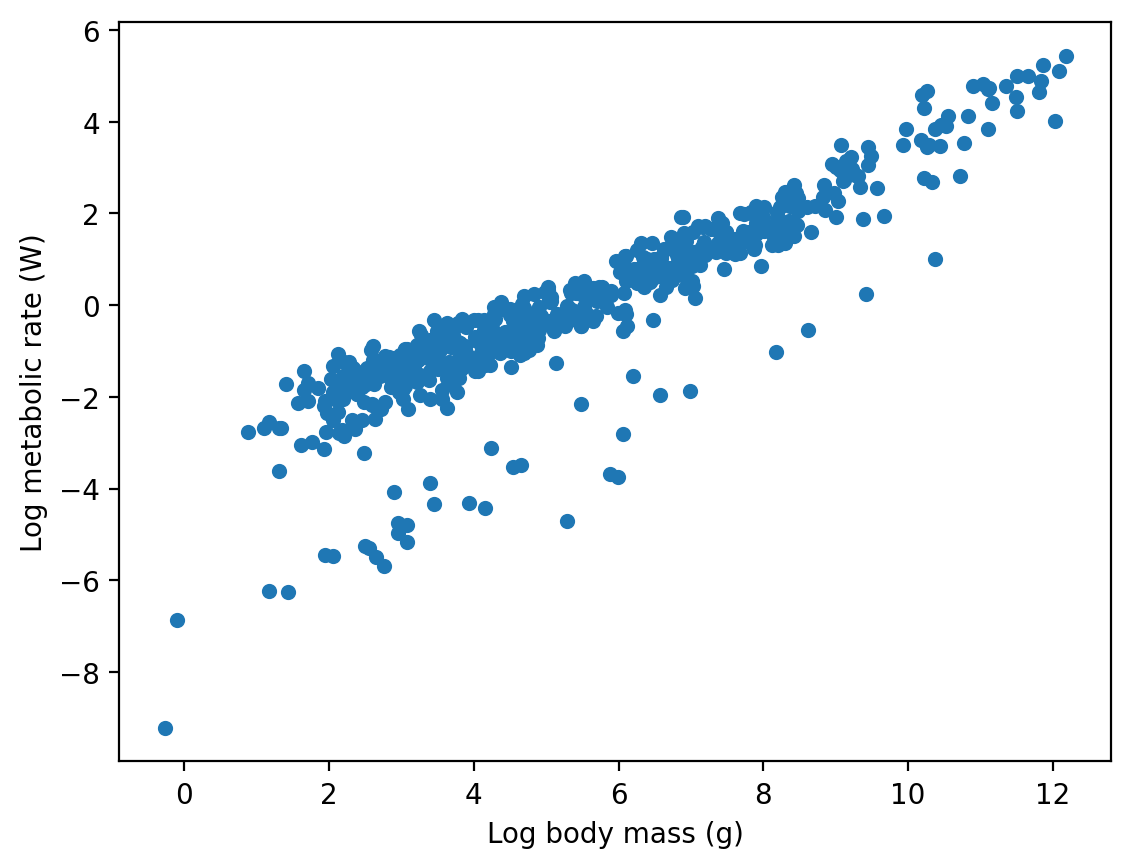

In [14]:
data.plot.scatter(x='Log body mass (g)', y='Log metabolic rate (W)');

Next, let's check if we can understand the grouping that we observe in the figure.
We will check how many records do we have for each Class (as in the taxonomic unit).

In [15]:
class_counts = data['Class'].value_counts()
print(class_counts)

Class
Mammalia    417
Aves        171
Amphibia     18
Reptilia     16
Name: count, dtype: int64


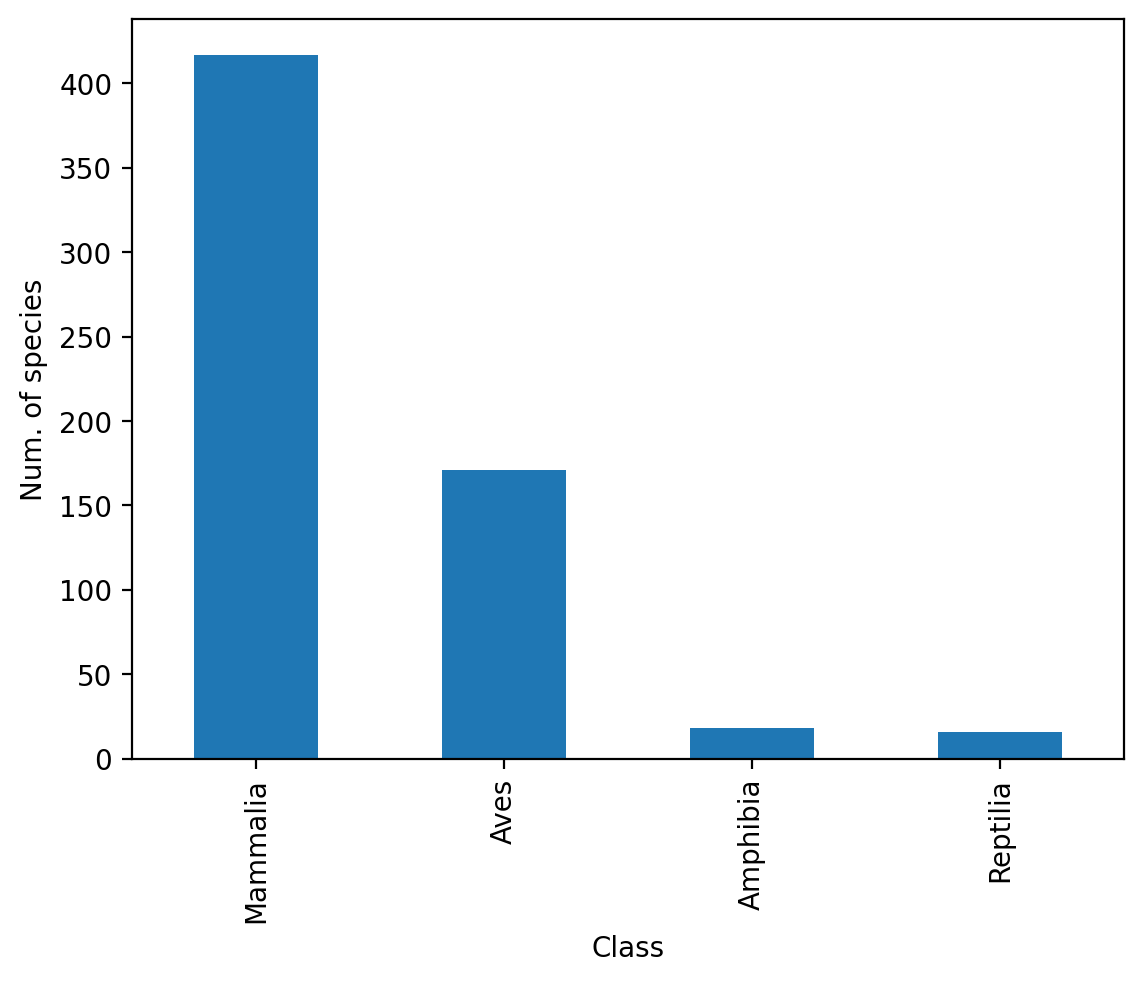

In [16]:
class_counts.plot.bar()
plt.ylabel('Num. of species');

So we have lots of mammals and birds, and a few reptiles and amphibians. This is important as amphibian and reptiles could have a different replationship between mass and metabolism because they are cold blooded, and this fits nicely with the two groupings we found -- let's verify this by coloring the markers by the class. For this we need to first convert the class column to a categorical data type.

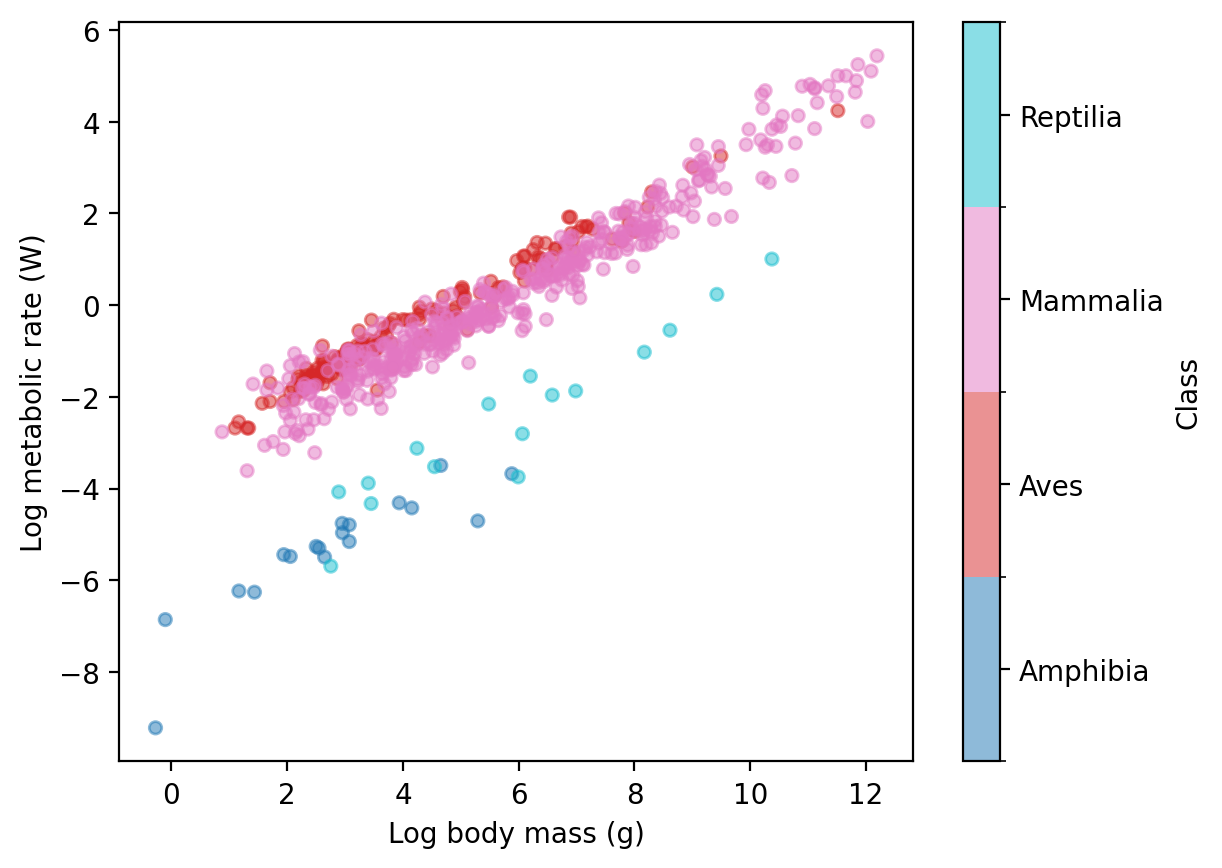

In [17]:
data['Class'] = pd.Categorical(data['Class'])
data.plot.scatter(x='Log body mass (g)', y='Log metabolic rate (W)', c='Class', cmap='tab10', alpha=0.5);

## Exercise: data frames

1) **Print the number** of reptiles are in this dataset, and how many of them are of the genus `Python`.

**Reminder**
- Edit cell by double clicking
- Run cell by pressing _Shift+Enter_
- Get autocompletion by pressing _Tab_
- Get documentation by pressing _Shift+Tab_

In [20]:
print("# of reptiles: ", reptiles)
print("# of pythons: ", pythons)

# of reptiles:  16
# of pythons:  2


2) **Plot the histogram of the mammal body masses** using `plot.hist()`.
Since most mammals are small, the histogram looks better if we plot a cumulative distribution rather then the distribution - we can do this with the `cumulative` argument. You also need to specify a higher `bins` argument then the default.

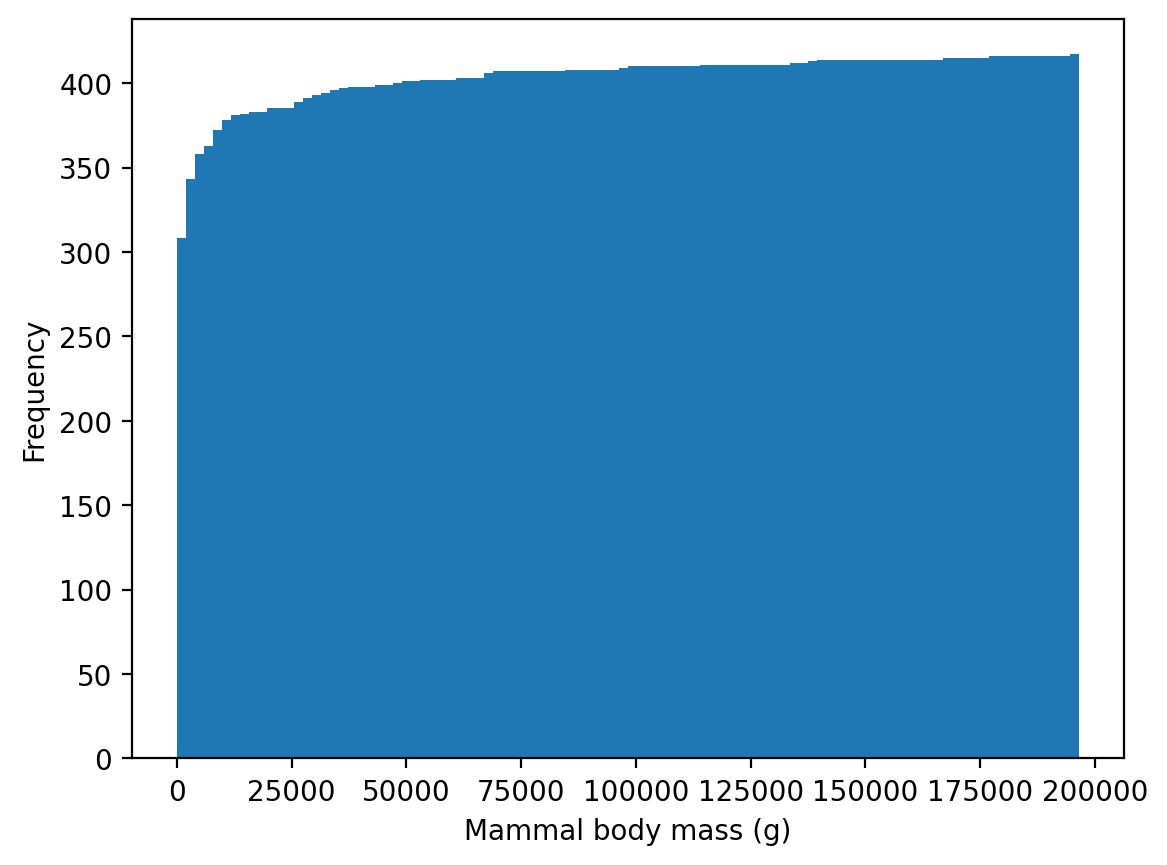

# Plotly

Let's do a simple linear regression plot; but let's do it in separate for each Class.
We can do this kind of thing with Matplotlib and [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html), but a  good tool for sophisticated visualizations is **[Plotly](https://plotly.com/graphing-libraries/)**.

Other popular visualization packages are [bokeh](https://bokeh.org/), [altair](https://altair-viz.github.io), [seaborn]((http://seaborn.pydata.org)), and [ggplot](https://yhat.github.io/ggpy/).

In [38]:
import plotly.express as px
import plotly.io as pio
pio.templates.default = "simple_white"

Plotly can visualize [regression lines](https://plotly.com/python/linear-fits/); the underlying regression is performed by `statsmodels`.

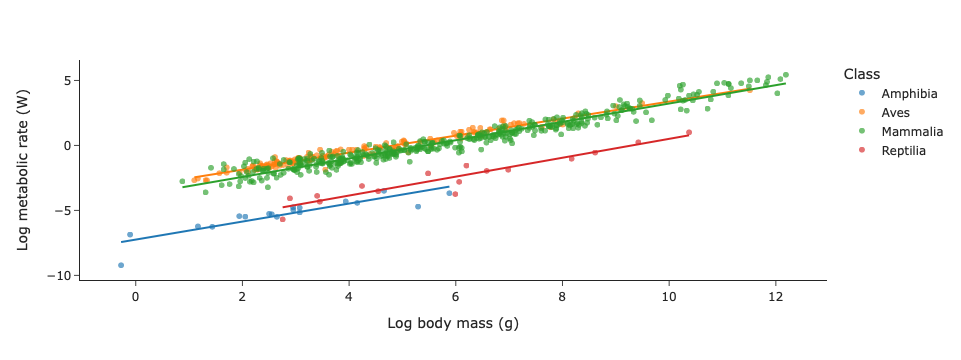

In [54]:
fig = px.scatter(
    data,
    x='Log body mass (g)', 
    y='Log metabolic rate (W)', 
    color='Class',
    opacity=0.65,
    trendline='ols',
    width=600
)
fig.show()

Let's use [facets](https://plotly.com/python/facet-plots/) to separate this plot to four subplots, one for each class of species.

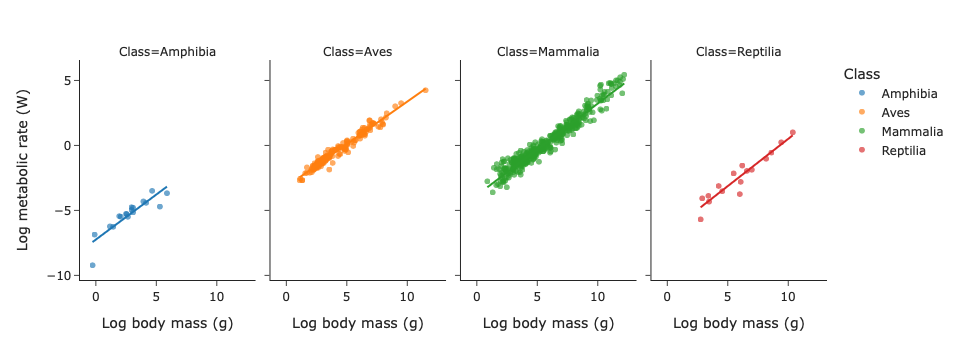

In [40]:
fig = px.scatter(
    data,
    x='Log body mass (g)', 
    y='Log metabolic rate (W)', 
    color='Class',
    facet_col='Class',
    opacity=0.65,
    trendline='ols',
)
fig.show()

We can see that mammals and birds have a clear correlation between size and metabolism and that it extends over a nice range of mass, so let's stick to mammals; next up we will see which orders of mammals we have.

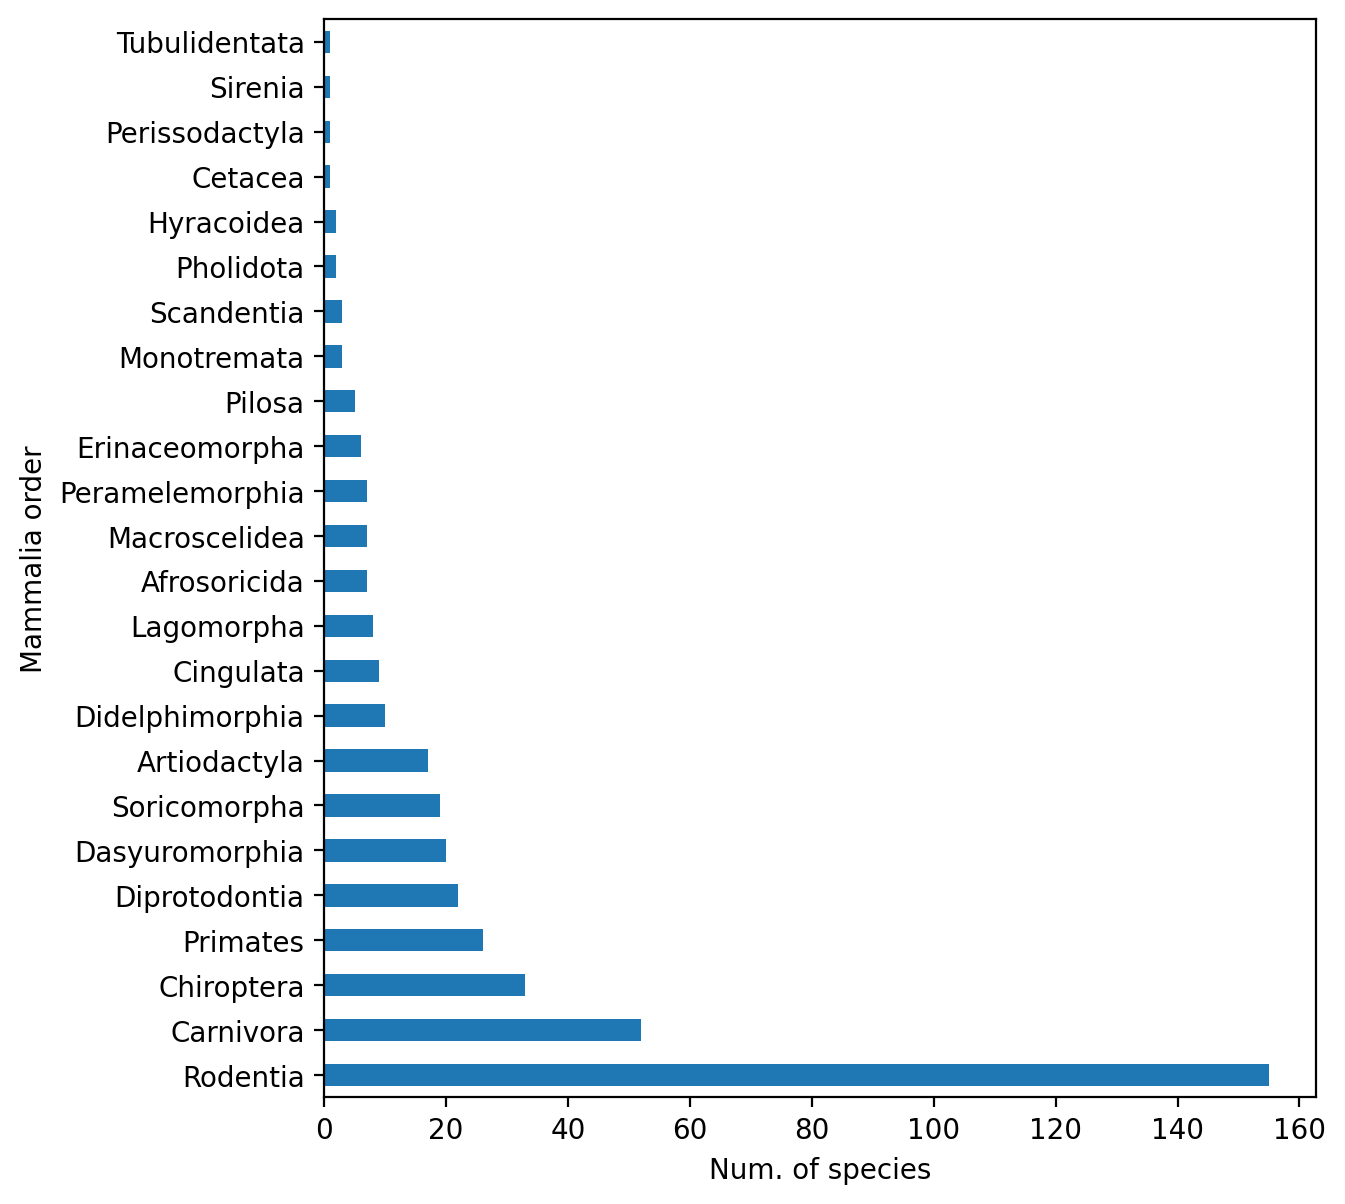

In [41]:
mammalia = data[data['Class'] == 'Mammalia']

order_counts = mammalia['Order'].value_counts()
ax = order_counts.plot.barh()
ax.set(
    xlabel='Num. of species',
    ylabel='Mammalia order'
)
ax.figure.set_figheight(7)

You see we have alot of rodents and carnivores, but also a good number of bats (_Chiroptera_) and primates.

Let's continue with orders that have at least 20 species - this also includes some cool marsupials like Kangaroo, Koala and [Taz](http://upload.wikimedia.org/wikipedia/en/c/c4/Taz-Looney_Tunes.svg) (Diprotodontia and Dasyuromorphia)

In [42]:
orders = order_counts[order_counts >= 20]
print(orders)
abund_mammalia = mammalia[mammalia['Order'].isin(orders.index)]

Order
Rodentia          155
Carnivora          52
Chiroptera         33
Primates           26
Diprotodontia      22
Dasyuromorphia     20
Name: count, dtype: int64


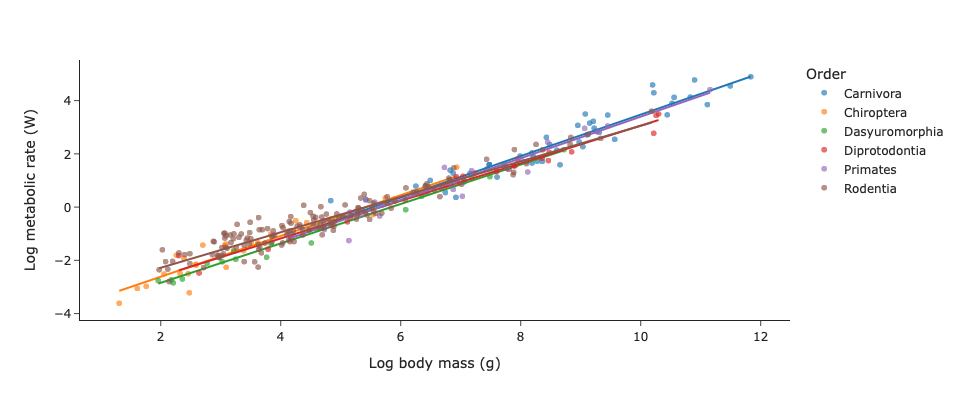

In [51]:
fig = px.scatter(
    abund_mammalia,
    x='Log body mass (g)', 
    y='Log metabolic rate (W)', 
    color='Order',
    opacity=0.65,
    trendline='ols',
    height=400, width=600
)
fig.show()

There's too much data here, and part of the problem is that some orders are large (e.g. primates) and some are small (e.g. rodents).

Let's plot a separate regression plot for each order.

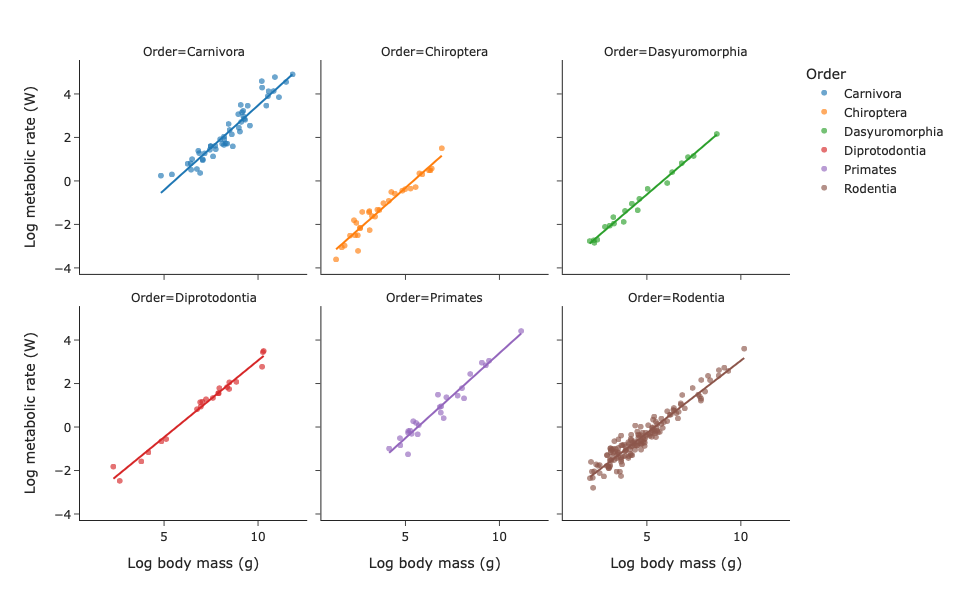

In [52]:
fig = px.scatter(
    abund_mammalia,
    x='Log body mass (g)', 
    y='Log metabolic rate (W)', 
    color='Order',
    facet_col='Order',
    facet_col_wrap=3,
    opacity=0.65,
    trendline='ols',
    height=600
)
fig.show()

# References

- Examples: [Plotly gallery](https://python-graph-gallery.com/plotly/)
- [Python graph gallery](https://python-graph-gallery.com)
- Book: [Think Stats](greenteapress.com/thinkstats2/html/index.html) by Allen Downey - statistics with Python. Free Ebook.

# Colophon
This notebook was written by [Yoav Ram](http://python.yoavram.com).

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)